<a href="https://colab.research.google.com/github/Sanjeeviit/MLT/blob/main/Day_2_LLM_Workbook_LLM_Workshop_Jan_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important components
1. Dataset: for LLMs datasets come with billions to trillions of tokens. Hence pretraining/complete training of a large model is very expensive and time consuming.
- Training is done in clusters, in distributed manner.
- Trainer API (from HF): can automate training of large models over distributed resources.
2. Finetuning: Even a pretrained model needs dataset that is used for fine tuning the model for a specific task/domain.

2. Tokenize:
- Normalization: upper cases to lower cases etc.
- Pre-tonization: split the words
- Tokenization algorithm:

3. Transformer Model:
- You may have task/problem that you would like to solve it quickly. This can be accomplished by downloading a model from HF and fine tuning it. HF has connected researchers and developers to share and use their solutions.

### Why PyTorch and HF?

1. Pythonic
2. Huge support from HF (https://huggingface.co/docs/transformers/en/index)
3. Trainer API only supports PyTorch.
4. Huge community support.


# Should I train a model from end to end?

GPT-3 paper: https://arxiv.org/pdf/2005.14165
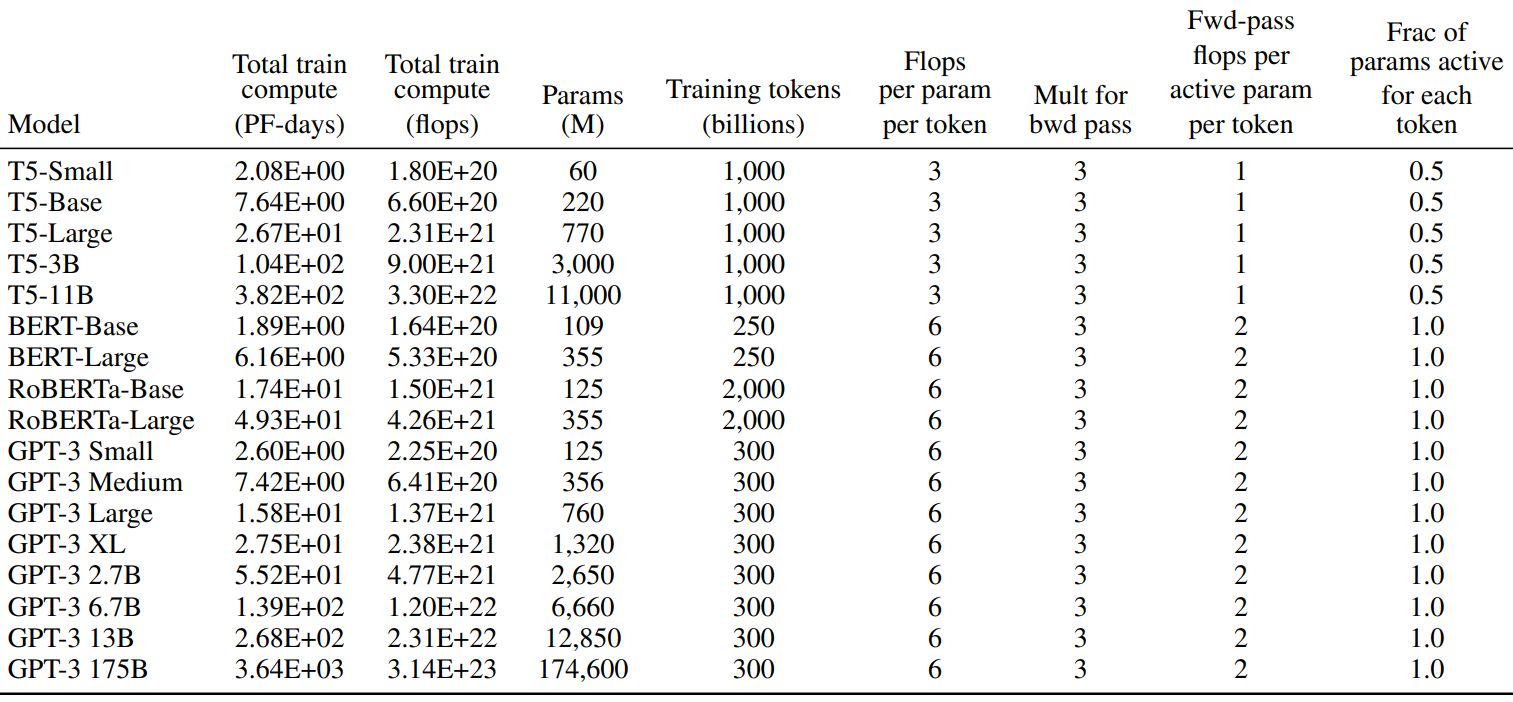

In [ ]:
t5_small_model_compute = 1.8e20
my_machine_compute = 0.1e12 # FLOPS=floating point operations per second
# TFLOS = 10^12 FLOPS
print("Days to train T5 Small", t5_small_model_compute/(3600*24*my_machine_compute))
print("Years to train T5 Small", t5_small_model_compute/(3600*24*365*my_machine_compute))
print("Centuries to train T5 Small", t5_small_model_compute/(3600*24*365*100*my_machine_compute))

Days to train T5 Small 20833.333333333332
Years to train T5 Small 57.077625570776256
Centuries to train T5 Small 0.5707762557077626


# Hugging Face Tour
- Datasets
- Models
- Spaces
- Paid services

# Import the modules

In [ ]:
from pprint import pprint
from transformers import AutoTokenizer, pipeline
import transformers
import torch

## Code Llama example

#### A smple input

In [ ]:
input_text = ["India landed on the moon bringing great joy to the nation",
              "I am not feeling well today",
              "India has the most number of deaths in the world."]

#### Choose the model from HF hub

In [ ]:
# model_checkpoint = "distilbert-base-uncased"
model_checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

#### What is the vocab size?

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.get_added_vocab()

{'[PAD]': 0, '[UNK]': 100, '[CLS]': 101, '[SEP]': 102, '[MASK]': 103}

##### Looking inside the downloaded files

In [ ]:
!ls -lah /

total 452K
drwxr-xr-x   1 root root 4.0K Jan 11 15:06 .
drwxr-xr-x   1 root root 4.0K Jan 11 15:06 ..
lrwxrwxrwx   1 root root    7 Oct  4  2023 bin -> usr/bin
drwxr-xr-x   2 root root 4.0K Apr 18  2022 boot
drwxr-xr-x   1 root root 4.0K Jan  9 14:24 content
-rw-r--r--   1 root root 4.3K Nov 10  2023 cuda-keyring_1.0-1_all.deb
drwxr-xr-x   1 root root 4.0K Jan  9 14:36 datalab
drwxr-xr-x   5 root root  360 Jan 11 15:06 dev
-rwxr-xr-x   1 root root    0 Jan 11 15:06 .dockerenv
drwxr-xr-x   1 root root 4.0K Jan 11 15:06 etc
drwxr-xr-x   2 root root 4.0K Apr 18  2022 home
lrwxrwxrwx   1 root root    7 Oct  4  2023 lib -> usr/lib
lrwxrwxrwx   1 root root    9 Oct  4  2023 lib32 -> usr/lib32
lrwxrwxrwx   1 root root    9 Oct  4  2023 lib64 -> usr/lib64
lrwxrwxrwx   1 root root   10 Oct  4  2023 libx32 -> usr/libx32
drwxr-xr-x   2 root root 4.0K Oct  4  2023 media
drwxr-xr-x   2 root root 4.0K Oct  4  2023 mnt
-rw-r--r--   1 root root  17K Nov 10  2023 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   1

In [ ]:
! find / -name "vocab.txt"

In [ ]:
!ls /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/714eb0fa89d2f80546fda750413ed43d93601a13/ -lh

In [ ]:
!ls /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs -lh

In [ ]:
!cat /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs/3ed34255a7cb8e6706a8bb21993836e99e7b959f

In [ ]:
!head /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs/fb140275c155a9c7c5a3b3e0e77a9e839594a938

In [ ]:
!cat /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/714eb0fa89d2f80546fda750413ed43d93601a13/config.json

#### Tokenize the input

In [ ]:
tokenized_text = tokenizer(input_text)
pprint(tokenized_text)

##### Are there any special tokens?

In [ ]:
print(tokenizer.convert_ids_to_tokens([101,102]))

In [ ]:
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_tokens_extended)

#### Get tokens from token ids of the input

In [ ]:
print(tokenizer.convert_ids_to_tokens(tokenized_text['input_ids'][2]))

#### Is there any relation between token ids and vocab file?

In [ ]:
import pandas as pd

In [ ]:
vocab_dict = pd.Series(open('/root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs/fb140275c155a9c7c5a3b3e0e77a9e839594a938','r').readlines())

In [ ]:
# vocab_dict.index = range(1, len(vocab_dict)+1)

In [ ]:
vocab_dict[2634]

In [ ]:
vocab_dict[0]

In [ ]:
vocab_dict[102]

In [ ]:
vocab_dict

#### Can we pass the input token ids to a model? Is their type correct?

In [ ]:
tokenized_text = tokenizer(input_text, padding=True, return_tensors='pt')
pprint(tokenized_text)

In [ ]:
tokenizer(['Pseudopseudohypoparathyroidism'])

#### What is the type of padding used, dynamic or static?

#### If you are writing your custom tokenizer, what should be the format/type of its output?

#### How to pass the input to the model?

In [ ]:
from transformers import AutoModel
model = AutoModel.from_pretrained(model_checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

#### How to see model's architecture?

In [ ]:
pprint(model)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
# model['Embeddings']
model.state_dict()

In [ ]:
pprint(model)

#### How to see model's configuration?

In [ ]:
pprint(model.config)

In [ ]:
pprint(model.config.id2label[1])

In [ ]:
!ls /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs -lh

In [ ]:
!head /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs/7c3919835e442510166d267fe7cbe847e0c51cd26d9ba07b89a57b952b49b8aa

#### How many parameters are there in the model and what is its size?

In [ ]:
print("No. of parameters in the model:",model.num_parameters())

In [ ]:
print("Size of the model", model.num_parameters()*4/10**6)

#### How to get output form the model?

In [ ]:
output=model(**tokenized_text)
# print(output)
print(output.last_hidden_state)

In [ ]:
print(output.last_hidden_state.shape)

#### Why is "NativeLayerNormBackward0" at the end? How to remove it?

In [ ]:
with torch.inference_mode():
  output=model(**tokenized_text)
  print(output)
# print(output.last_hidden_state)

In [ ]:
output.last_hidden_state.shape

#### How to use the model for classification?

In [ ]:
from transformers import AutoModelForSequenceClassification
classification_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

#### Compare this model with hte previous model

In [ ]:
pprint(classification_model)

In [ ]:
pprint(model)

In [ ]:
classification_model(**tokenized_text)

In [ ]:
logits = classification_model(**tokenized_text)

In [ ]:
probability_scores = torch.nn.functional.softmax(logits.logits, dim =-1)
probability_scores

In [ ]:
predicted_labels = torch.argmax(probability_scores, dim=-1)

In [ ]:
predicted_labels

In [ ]:
predicted_classes = [classification_model.config.id2label[label_id] for label_id in predicted_labels.tolist()]


In [ ]:
print(predicted_classes)

# HF abstraction

In [ ]:
from transformers import TextClassificationPipeline
aclassifier = TextClassificationPipeline(model = classification_model, tokenizer =tokenizer)

In [ ]:
aclassifier(input_text)

### pipeline - highest level of abstraction

In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline('sentiment-analysis')

In [ ]:
classifier('Headphone worked will only for 2 days, after that left one stopped working')

In [ ]:
generator = pipeline('text-generation')

In [ ]:
generator("I will have to skip today's school because")

In [ ]:
dir(generator)

In [ ]:
generator = pipeline(model='distilgpt2')
generator("I wish I could study longer")

In [ ]:
unmask_model = pipeline('fill-mask')

In [ ]:
unmask_model('My mother was so <mask> that I had to leave', top_k=10)